In [1]:
from PIL import Image
from pylab import *
import copy


In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import warnings 
warnings.filterwarnings('ignore')

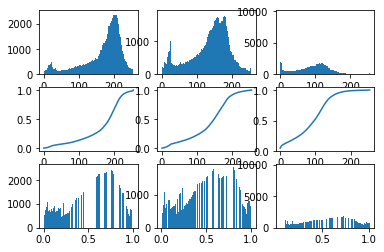

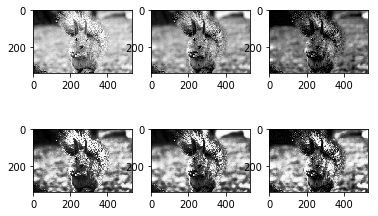

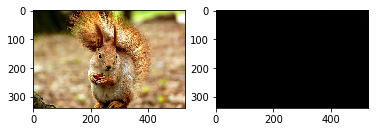

In [10]:
im=array(Image.open(r"D:\1.jpg"))

r=im[:,:,0]   #红色通道
g=im[:,:,1]
b=im[:,:,2]   #蓝色通道

figure()

imhist_r,bins_r=histogram(r,256,normed=True)
imhist_g,bins_g=histogram(g,256,normed=True)
imhist_b,bins_b=histogram(b,256,normed=True)

subplot(331)
hist(r.flatten(),256)
subplot(332)
hist(g.flatten(),256)
subplot(333)
hist(b.flatten(),256)


#各通道累积分布函数
cdf_r=imhist_r.cumsum()
cdf_g=imhist_g.cumsum()
cdf_b=imhist_b.cumsum()


#累积函数归一化（由0-1变换至0-255）
cdf_r=cdf_r*cdf_r[-1]
cdf_g=cdf_g*cdf_g[-1]
cdf_b=cdf_b*cdf_b[-1]

#绘制累积分布函数
subplot(334)
plot(bins_r[:256],cdf_r)
subplot(335)
plot(bins_g[:256],cdf_g)
subplot(336)
plot(bins_b[:256],cdf_b)

#绘制直方图均衡化后的直方图
im_r=interp(r.flatten(),bins_r[:256],cdf_r)
im_g=interp(g.flatten(),bins_g[:256],cdf_g)
im_b=interp(b.flatten(),bins_b[:256],cdf_b)

#显示直方图图像
subplot(337)
hist(im_r,256)
subplot(338)
hist(im_g,256)
subplot(339)
hist(im_b,256)

#显示原始通道图与均衡化之后的通道图
figure()
gray()

#原始通道图
im_r_s=r.reshape([im.shape[0],im.shape[1]])
im_g_s=g.reshape([im.shape[0],im.shape[1]])
im_b_s=b.reshape([im.shape[0],im.shape[1]])

#均衡化后的通道图
im_r=im_r.reshape([im.shape[0],im.shape[1]])
im_g=im_g.reshape([im.shape[0],im.shape[1]])
im_b=im_b.reshape([im.shape[0],im.shape[1]])

subplot(231)
imshow(im_r_s)

subplot(232)
imshow(im_g_s)

subplot(233)
imshow(im_b_s)

subplot(234)
imshow(im_r)

subplot(235)
imshow(im_g)

subplot(236)
imshow(im_b)

#显示原始图像与均衡化之后的图像
figure()

#均衡化之后的图像
im_p=copy.deepcopy(im)

im_p[:,:,0]=im_r
im_p[:,:,1]=im_g
im_p[:,:,2]=im_b

subplot(121)
imshow(im)
subplot(122)
imshow(im_p)
show()







